<a href="https://colab.research.google.com/github/Ragnarok540/music/blob/main/src/white_noise_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

# White Noise

In [4]:
def white_noise(duration: float = 1.0,
                amplitude: float = 0.5,
                sample_rate: int = 44100) -> np.ndarray:
    n_s = int(duration * sample_rate)
    noise = np.random.uniform(-1, 1, n_s)
    noise *= amplitude
    return noise

def plot_signal(signal, start=0, end=500):
    plt.figure(figsize=(15, 2))
    plt.grid(True)
    plt.plot(signal[start:end])
    plt.show()

my_sound = white_noise(duration=3.0)
Audio(my_sound, rate=44100)

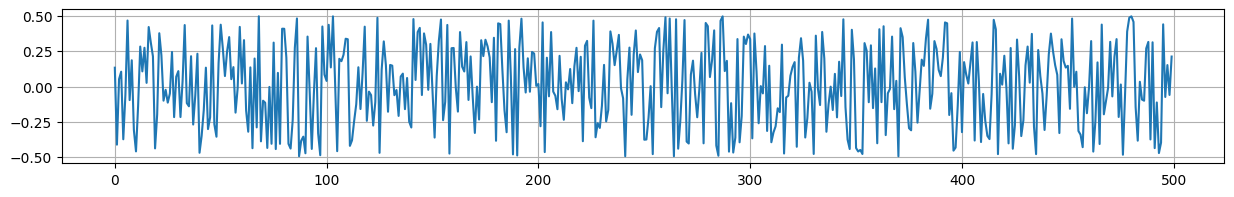

In [5]:
plot_signal(my_sound)

# Low Pass Filter

In [6]:
def lowpass(wave: np.ndarray, dt: float, rc: float) -> np.ndarray:
    result = np.zeros_like(wave)
    alpha = dt / (rc + dt)
    print(alpha)
    result[0] = alpha * wave[0]

    for i in range(1, len(wave)):
        result[i] = result[i - 1] + alpha * (wave[i] - result[i - 1])

    return result

low = lowpass(my_sound, 3, 50)
Audio(low, rate=44100)

0.05660377358490566


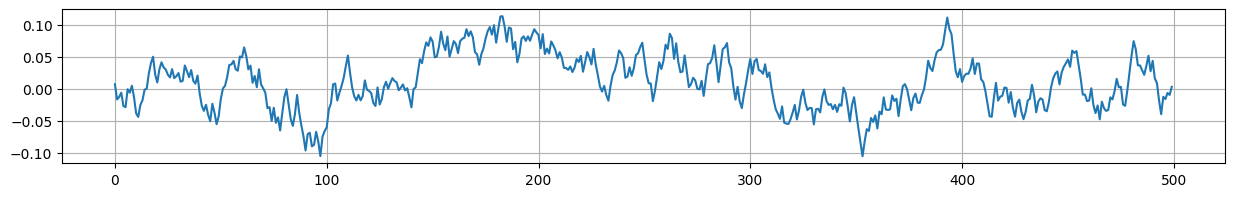

In [7]:
plot_signal(low)

# High Pass Filter

In [25]:
def highpass(wave: np.ndarray, dt: float, rc: float) -> np.ndarray:
    result = np.zeros_like(wave)
    alpha = rc / (rc + dt)
    print(alpha)
    result[0] = wave[0]

    for i in range(1, len(wave)):
        result[i] = alpha * (result[i - 1] + wave[i] - wave[i - 1])

    return result

high = highpass(my_sound, 50, 3)
Audio(high, rate=44100)

0.05660377358490566


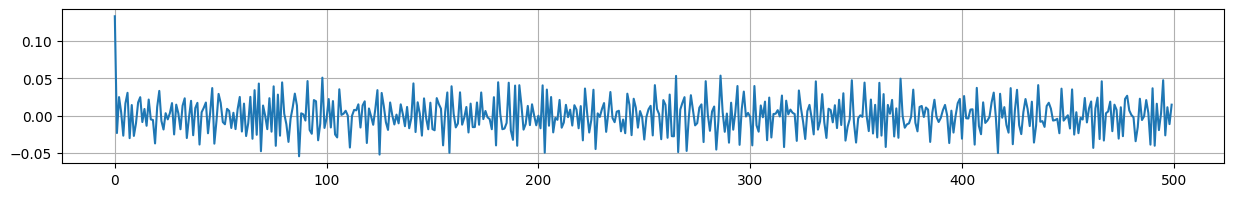

In [26]:
plot_signal(high)